Name: Munasinghe M.M.R.H.                                                                           
Index Number: 190399L

x_1 =  2.5338579558596424 f(x_1) =  -9.08383730851616
x_2 =  -2.4003994283530288 f(x_2) =  -53.11840483760499


Text(0.5, 1.0, 'When Initial value is 0.6')

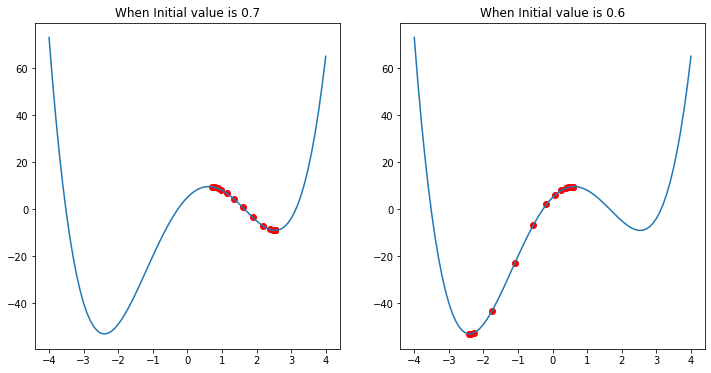

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    w = np.array([1,-1,-12,15,5])
    M = np.size(w)-1
    return np.sum([x**i*w[M-i] for i in range(0,M+1)], axis=0)

def g(x):
    w = np.array([1,-1,-12,15,5])
    M = np.size(w)-1
    return np.sum([i*x**(i-1)*w[M-i] for i in range(0,M+1)], axis=0)

alpha = 0.02

x_1 = 0.7
x_hist_1 = np.array(x_1)
fx_hist_1 = np.array(f(x_1))
for i in range(20):
    x_1  = x_1  - alpha*g(x_1)
    x_hist_1 = np.append(x_hist_1, x_1)
    fx_hist_1 = np.append(fx_hist_1, f(x_1))

x_2 = 0.6
x_hist_2 = np.array(x_2)
fx_hist_2 = np.array(f(x_2))
for i in range(20):
    x_2 = x_2 - alpha*g(x_2)
    x_hist_2 = np.append(x_hist_2, x_2)
    fx_hist_2 = np.append(fx_hist_2, f(x_2))

print('x_1 = ', x_1,'f(x_1) = ', f(x_1))
print('x_2 = ', x_2,'f(x_2) = ', f(x_2))

fig , ax = plt.subplots(1,2, figsize = (12,6))
delta = 0.1
x_ = np.arange(-4,4+delta,delta)
ax[0].plot(x_,f(x_))
ax[0].scatter(x_hist_1,fx_hist_1, c='r')
ax[0].set_title("When Initial value is 0.7")
ax[1].plot(x_,f(x_))
ax[1].scatter(x_hist_2,fx_hist_2, c='r')
ax[1].set_title("When Initial value is 0.6")


x_1 =  -0.29497479850285213 f(x_1) =  -0.43550699945570187
x_2 =  -2.4003994283530288 f(x_2) =  -53.11840483760499


Text(0.5, 1.0, 'When Learning rate is tuned')

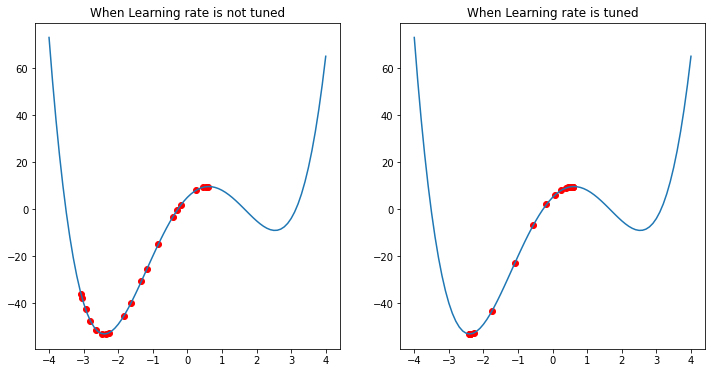

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    w = np.array([1,-1,-12,15,5])
    M = np.size(w)-1
    return np.sum([x**i*w[M-i] for i in range(0,M+1)], axis=0)

def g(x):
    w = np.array([1,-1,-12,15,5])
    M = np.size(w)-1
    return np.sum([i*x**(i-1)*w[M-i] for i in range(0,M+1)], axis=0)

alpha = 0.05

x_1 = 0.6
x_hist_1 = np.array(x_1)
fx_hist_1 = np.array(f(x_1))
for i in range(20):
    x_1  = x_1  - alpha*g(x_1)
    x_hist_1 = np.append(x_hist_1, x_1)
    fx_hist_1 = np.append(fx_hist_1, f(x_1))

alpha = 0.02
x_2 = 0.6
x_hist_2 = np.array(x_2)
fx_hist_2 = np.array(f(x_2))
for i in range(20):
    x_2 = x_2 - alpha*g(x_2)
    x_hist_2 = np.append(x_hist_2, x_2)
    fx_hist_2 = np.append(fx_hist_2, f(x_2))

print('x_1 = ', x_1,'f(x_1) = ', f(x_1))
print('x_2 = ', x_2,'f(x_2) = ', f(x_2))

fig , ax = plt.subplots(1,2, figsize = (12,6))
delta = 0.1
x_ = np.arange(-4,4+delta,delta)
ax[0].plot(x_,f(x_))
ax[0].scatter(x_hist_1,fx_hist_1, c='r')
ax[0].set_title("When Learning rate is not tuned")
ax[1].plot(x_,f(x_))
ax[1].scatter(x_hist_2,fx_hist_2, c='r')
ax[1].set_title("When Learning rate is tuned")


In [60]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10, mnist

(x_train, y_train), (x_test, y_test ) = cifar10.load_data()
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
print ("x_train -> " , x_train . shape )

Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
x_train = x_train[range(Ntr),:]
x_test = x_test[range(Nte),:]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]

K = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train,num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train/= 255.
x_test/= 255.

# Utility function for diaplaying
def display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w, showim = True):
    plt.plot(loss_history)
    
     # For diapaying the weights matrix w as an image. 32*32*3 assumption is there
    if showim:
        f, axarr = plt.subplots(2, 5)
        f.set_size_inches(16, 6)        
        for i in range(10):
            img = w[:, i].reshape(32, 32, 3)# CIFAR10
            # img = w1[:, i].reshape(28, 28)# MNIST    
            img = (img - np.amin(img))/(np.amax(img) - np.amin(img))
            axarr[i//5, i%5].imshow(img)
        plt.show()

    train_acc = np.mean(np.abs(np.argmax(y_train, axis=1) == np.argmax(y_train_pred, axis=1)))
    print("train_acc = ", train_acc)

    test_acc = np.mean(np.abs(np.argmax(y_test, axis=1) == np.argmax(y_test_pred, axis=1)))
    print("test_acc = ", test_acc)


x_train ->  (50000, 32, 32, 3)


In [61]:
std = 1e-5
w=std*np.random.randn(Din,K)
b=np.zeros(K)
lr=1e-3
lr_decay = 0.1
epochs = 11
batch_size = 1000
loss_history = []
rng = np.random.default_rng(seed=0)

for e in range(epochs):
    indices=np.arange(Ntr)
    rng.shuffle(indices)
    for batch in range(Ntr//batch_size):
        batch_indices = indices[batch*batch_size:(batch+1)*batch_size]
        x = x_train[batch_indices]
        y = y_train[batch_indices]
        
        #forward pass
        y_pred = x@w + b
        loss = 1./batch_size*np.square(y_pred-y).sum()
        loss_history.append(loss)
        
        #backward pass
        dy_pred = 1./batch_size*2.0*(y_pred-y)
        dw= x.T @ dy_pred
        db = dy_pred.sum(axis=0)*1
        w = w-lr*dw
        b = b-lr*db
    if e%5==0:
        print('Iteration %d/%d: loss %f'%(e,epochs,loss))
    if e%10 ==0:
        lr*=lr_decay

Iteration 0/11: loss 0.850471
Iteration 5/11: loss 0.836767
Iteration 10/11: loss 0.834916


**Here we use 1000 as minibatch size because for 100, noise is very high.**

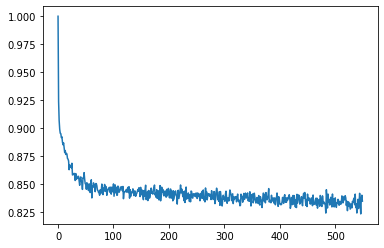

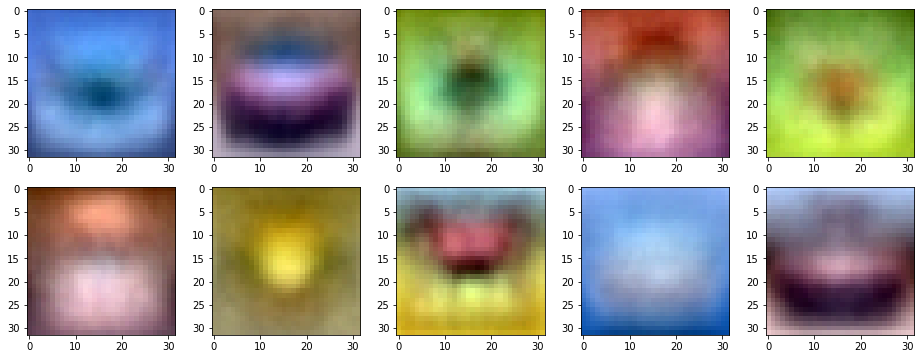

train_acc =  0.33574
test_acc =  0.3353


In [62]:
y_train_pred = x_train.dot(w) + b 
y_test_pred = x_test.dot(w) + b
display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w, showim= True)